In [2]:
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
ETOPO2_Arctic=scipy.io.loadmat('../_libs/ETOPO2_Arctic.mat')
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']

In [4]:
res_unit=10
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]

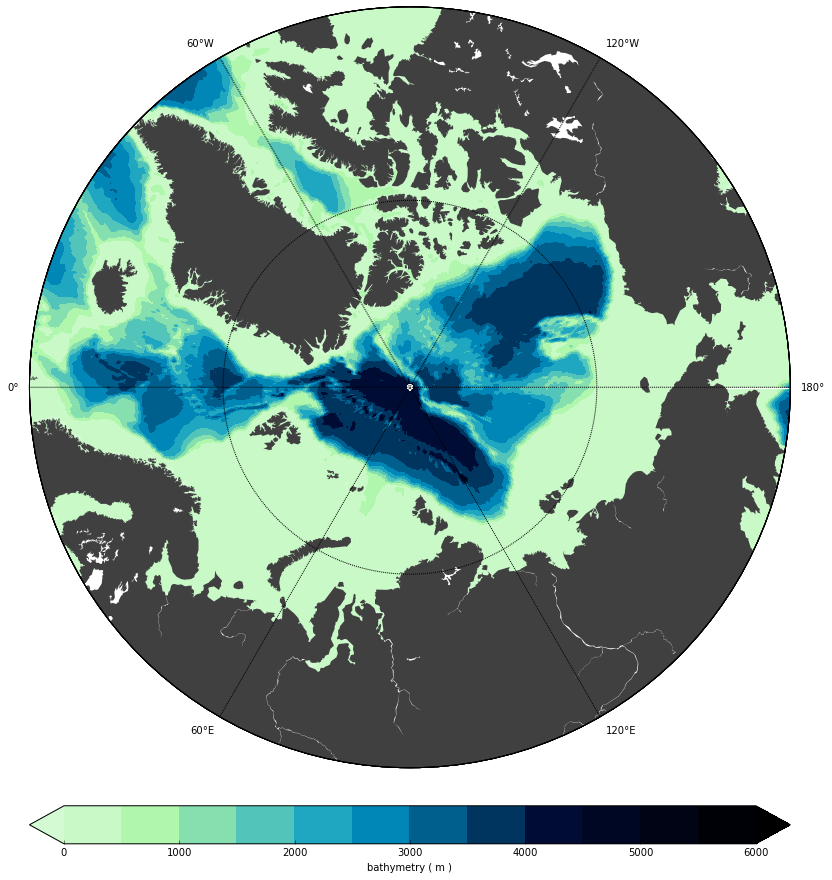

In [24]:
clevs=np.arange(0, 6500, 500)
fig=plt.figure(figsize=(15, 15))
ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=90, round=True)
parallels=np.arange(-90, 90, 15); meridians=np.arange(0, 360, 60)
proj.drawparallels(parallels, labels=[1, 1, 1, 1], fontsize=10, latmax=90)
proj.drawmeridians(meridians, labels=[1, 1, 1, 1], fontsize=10, latmax=90)
proj.fillcontinents(color=[0.25, 0.25, 0.25], lake_color='w') # coral
# compute native x,y coordinates of grid.
x, y=proj(lon_arctic, lat_arctic)
# contourf the bathmetry
CS=proj.contourf(x, y, topo_arctic*-1, clevs, cmap=cm.GMT_ocean_r, extend='both')
# colorbar
CBar=proj.colorbar(CS, 'bottom', size='5%', pad='5%')
CBar.set_label('bathymetry ( m )', fontsize=10)
CBar.ax.tick_params(axis='y', length=20)
CBar.ax.invert_yaxis() 
